In [1]:
import torch

from vit_shapley.CIFAR_10_Dataset import CIFAR_10_Dataset, CIFAR_10_Datamodule, apply_masks

datamodule = CIFAR_10_Datamodule(num_players=9, num_mask_samples=2, paired_mask_samples=True)
datamodule.setup()


In [2]:
data = next(iter(datamodule.train_dataloader()))
print(data.keys())

dict_keys(['images', 'labels', 'masks'])


In [3]:
print(f"""
    images shape is {tuple(data['images'].shape)},
    labels shape is {tuple(data['labels'].shape)},
    masks shape is {tuple(data['masks'].shape)}
""")

images = data['images']
labels = data['labels']
masks = data['masks']
print("labels=", list(labels.numpy()))


    images shape is (32, 3, 224, 224),
    labels shape is (32,),
    masks shape is (32, 2, 9)

labels= [9, 1, 2, 4, 5, 8, 9, 8, 9, 4, 1, 5, 9, 7, 2, 1, 4, 4, 2, 4, 9, 0, 4, 2, 6, 5, 5, 1, 4, 3, 4, 3]


truck


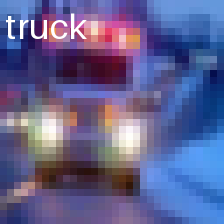

In [4]:
print(datamodule.classes[labels[0]])
CIFAR_10_Dataset.to_image(images[0], label=datamodule.classes[labels[0]])

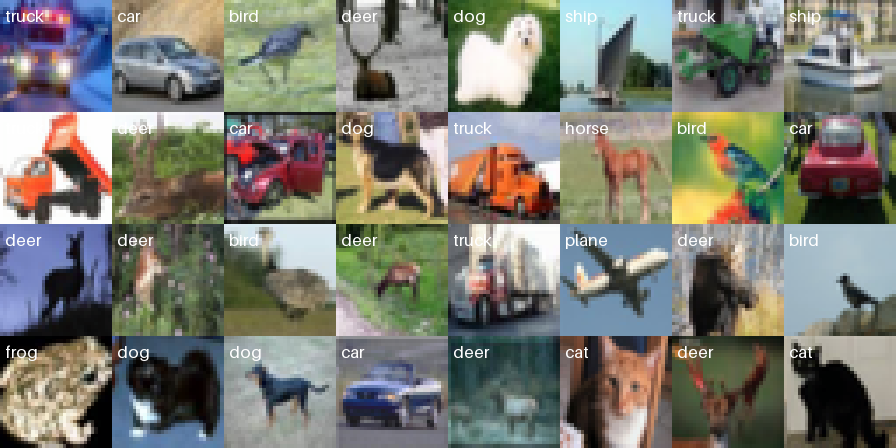

In [5]:
CIFAR_10_Dataset.to_image_grid(images, labels, scale=1/2)

In [6]:
images_masked = apply_masks(images, masks)
print(images_masked.shape)

torch.Size([32, 2, 3, 224, 224])


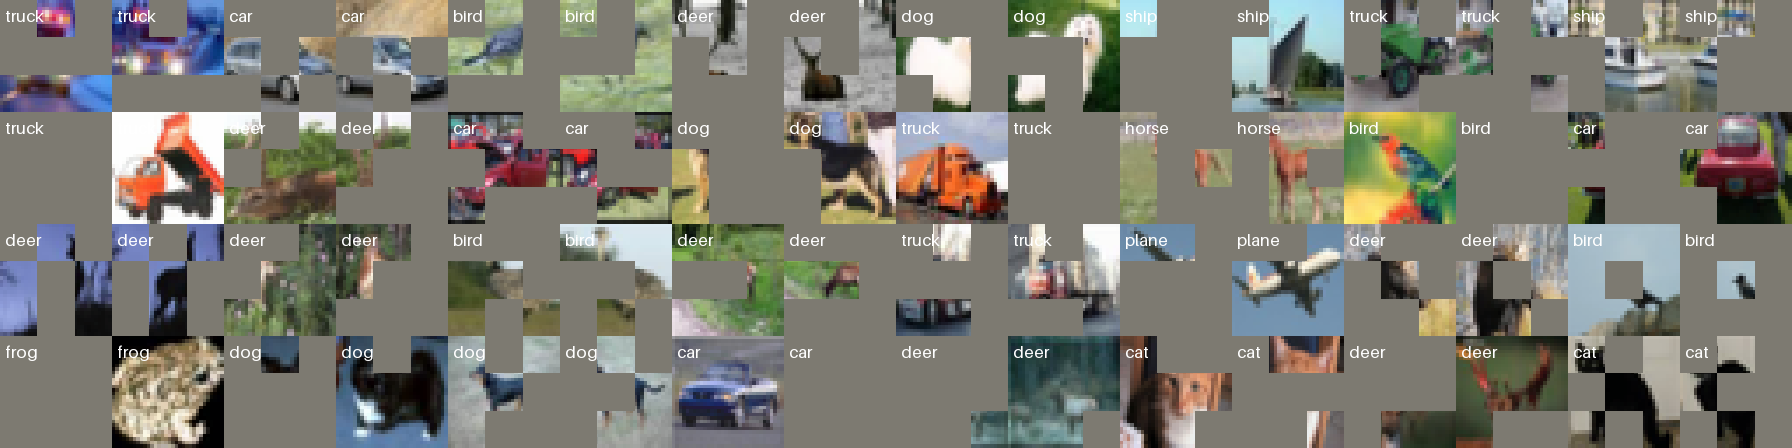

In [7]:
# Reshape to (-1, C, H, W) in case there is a dimension for n_masks_per_image.
images_masked = images_masked.view((-1,) + images_masked.shape[-3:])
n_masks_per_image = images_masked.shape[0] // images.shape[0]
CIFAR_10_Dataset.to_image_grid(images_masked, torch.repeat_interleave(labels, n_masks_per_image), scale=1/2, n_columns=n_masks_per_image * 8)